# Ice-age dynamics: Earth Orbit
----

## Simple sinus-functions

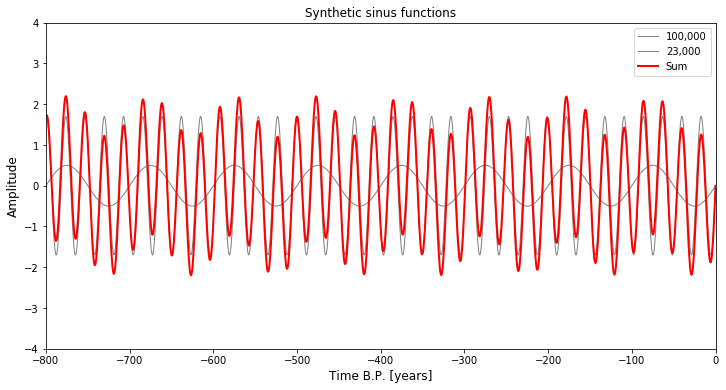

In [6]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed
import ipywidgets as widgets

# define frequencies
f1 = 100000.; a1 = 1.0 # eccentricity
f2 =  41000.; a2 = 1.0 # obliquity
f3 =  23000.; a3 = 1.0 # precession
f4 =  19000.; a4 = 1.0 # precession
# timing
tmin  = -800000
tmax  = 0
tstep = 500
nmax  = int((tmax-tmin) / tstep)+1

#-----------------------------------------------------------------------
# create time series
#-----------------------------------------------------------------------
time = np.zeros(nmax);sin0 = np.zeros(nmax)
sin1 = np.zeros(nmax);sin2 = np.zeros(nmax)
sin3 = np.zeros(nmax);sin4 = np.zeros(nmax)
i=0
for t in np.arange(tmin,tmax+tstep,tstep):
    time[i] = t
    sin1[i] = np.sin(2.*np.pi*t/f1)
    sin2[i] = np.sin(2.*np.pi*t/f2)
    sin3[i] = np.sin(2.*np.pi*t/f3)
    sin4[i] = np.sin(2.*np.pi*t/f4)
    i = i + 1

#-----------------------------------------------------------------------
# define function to plot interactively
#-----------------------------------------------------------------------
def plot_sinus(f1,f2,f3,f4,a1,a2,a3,a4):
    plt.figure(figsize=(12.0, 6.0))
    plt.xlabel('Time B.P. [years]',size=12)
    plt.ylabel('Amplitude',size=12)
    plt.title('Synthetic sinus functions',size=12)
    sin = sin0
    if (f1):
        sin = sin + a1*sin1
        plt.plot(time/1000,a1*sin1,color='grey',linestyle='-',linewidth=1,label='100,000')
    if (f2):
        sin = sin + a2*sin2
        plt.plot(time/1000,a2*sin2,color='grey',linestyle='-',linewidth=1,label='41,000')
    if (f3):
        sin = sin + a3*sin3
        plt.plot(time/1000,a3*sin3,color='grey',linestyle='-',linewidth=1,label='23,000')
    if (f4):
        sin = sin + a4*sin4
        plt.plot(time/1000,a4*sin4,color='grey',linestyle='-',linewidth=1,label='19,000')
    plt.plot(time/1000,sin,color='red',linestyle='-',linewidth=2,label='Sum')

    plt.xlim([tmin/1000,tmax/1000])
    plt.ylim([-4,4])
    plt.legend(loc='upper right')
    plt.show()
        
# call interactive module
interactive_plot = interactive(plot_sinus,
                               f1=widgets.Checkbox(value=False,description='100,000 years',disabled=False),
                               a1=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
                               f2=widgets.Checkbox(value=False,description='41,000 years',disabled=False),
                               a2=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
                               f3=widgets.Checkbox(value=False,description='23,000 years',disabled=False),
                               a3=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
                               f4=widgets.Checkbox(value=False,description='19,000 years',disabled=False),
                               a4=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0))
output = interactive_plot.children[-1]
interactive_plot

## Spectra

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:67: RuntimeWarning: divide by zero encountered in true_divide


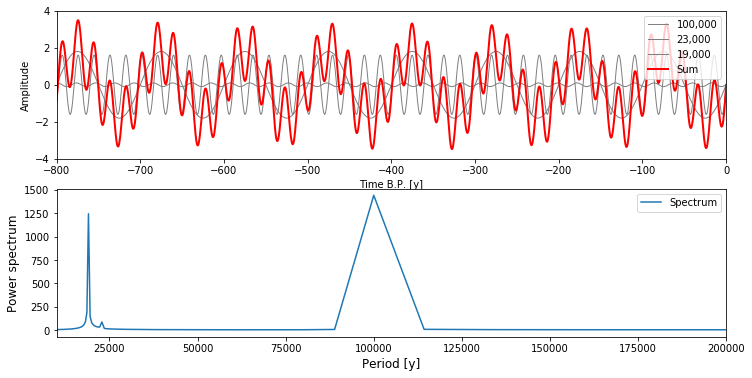

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, HBox, VBox
import ipywidgets as widgets

# define frequencies
f1 = 100000.; a1 = 1.0 # eccentricity
f2 =  41000.; a2 = 1.0 # obliquity
f3 =  23000.; a3 = 1.0 # precession
f4 =  19000.; a4 = 1.0 # precession
# timing
tmin  = -800000
tmax  = 0
tstep = 500
rate  = 1 / tstep
nmax  = int((tmax-tmin) / tstep)+1
#-----------------------------------------------------------------------
# create time series
#-----------------------------------------------------------------------
time = np.zeros(nmax);sin0 = np.zeros(nmax)
sin1 = np.zeros(nmax);sin2 = np.zeros(nmax)
sin3 = np.zeros(nmax);sin4 = np.zeros(nmax)
i=0
for t in np.arange(tmin,tmax+tstep,tstep):
    time[i] = t
    sin1[i] = np.sin(2.*np.pi*t/f1)
    sin2[i] = np.sin(2.*np.pi*t/f2)
    sin3[i] = np.sin(2.*np.pi*t/f3)
    sin4[i] = np.sin(2.*np.pi*t/f4)
    i = i + 1

#-----------------------------------------------------------------------
# define function to plot interactively
#-----------------------------------------------------------------------
def plot_spectra(rate,f1,f2,f3,f4,a1,a2,a3,a4):
    plt.figure(figsize=(12.0, 6.0))
    plot1=plt.subplot2grid((2,2), (0,0), colspan=2,rowspan=1)
    plot2=plt.subplot2grid((2,2), (1,0), colspan=2,rowspan=1)
    # plot time series
    plot1.set_xlabel('Time B.P. [y]')
    plot1.set_ylabel('Amplitude')
    sin = sin0
    if (f1):
        sin = sin + a1*sin1
        plot1.plot(time/1000,a1*sin1,color='grey',linestyle='-',linewidth=1,label='100,000')
    if (f2):
        sin = sin + a2*sin2
        plot1.plot(time/1000,a2*sin2,color='grey',linestyle='-',linewidth=1,label='41,000')
    if (f3):
        sin = sin + a3*sin3
        plot1.plot(time/1000,a3*sin3,color='grey',linestyle='-',linewidth=1,label='23,000')
    if (f4):
        sin = sin + a4*sin4
        plot1.plot(time/1000,a4*sin4,color='grey',linestyle='-',linewidth=1,label='19,000')
    plot1.plot(time/1000,sin,color='red',linestyle='-',linewidth=2,label='Sum')
    plot1.set_xlim([tmin/1000,tmax/1000])
    plot1.set_ylim([-4,4])
    plot1.legend(loc='upper right')
    # calculate and plot spectrum 
    p1 = np.abs(np.fft.rfft(sin))
    f = np.linspace(0, rate/2, len(p1))
    plot2.set_xlabel('Period [y]',size=12)
    plot2.set_ylabel('Power spectrum',size=12)
    plot2.set_xlim([10000,200000])
    #plt.xticks([0,4,7,10,15,20,25,30])
    plot2.plot(1./f,p1,label='Spectrum')
    plot2.legend()
    plt.show()
    
# call interactive module
interactive_plot = interactive(plot_spectra,
                               rate = fixed(1 / tstep),
                               f1=widgets.Checkbox(value=True,description='100,000 years',disabled=False),
                               a1=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
                               f2=widgets.Checkbox(value=False,description='41,000 years',disabled=False),
                               a2=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
                               f3=widgets.Checkbox(value=False,description='23,000 years',disabled=False),
                               a3=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
                               f4=widgets.Checkbox(value=False,description='19,000 years',disabled=False),
                               a4=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0))
output = interactive_plot.children[-1]
interactive_plot

## Simple conceptual ice-volume models

1. Calder
2. Imbrie & Imbrie
3. Paillard